# License Plate Recognition

## Importing Libraries

In [1]:
import cv2
import numpy as np
import imutils
import pytesseract
from matplotlib import pyplot as plt

In [2]:
def show_img(img):
    fig = plt.gcf()
    fig.set_size_inches(16, 8)
    plt.axis(False)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    

## Preprocessing image

741 920


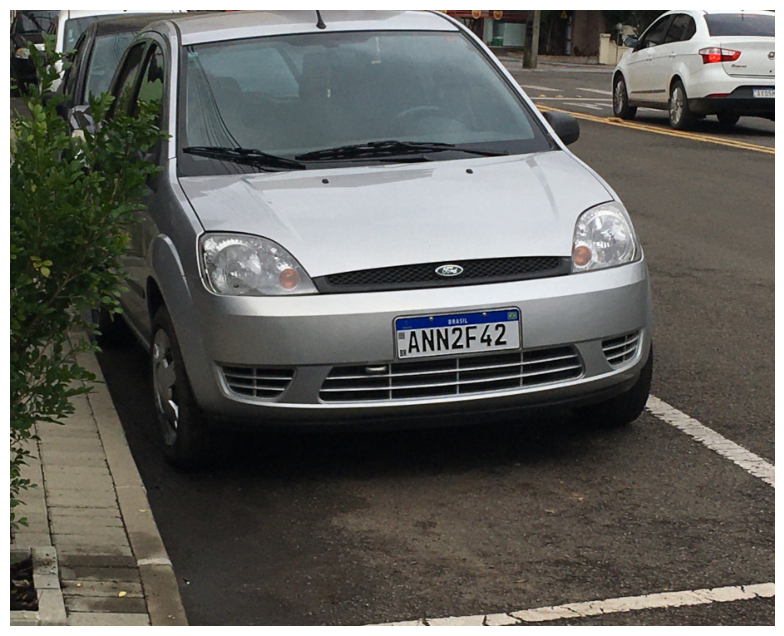

In [3]:
img = cv2.imread('Sources/Images/Images Project 3/car1.jpg')
(H, W) = img.shape[:2]
print(H, W)
show_img(img)

## Grayscale

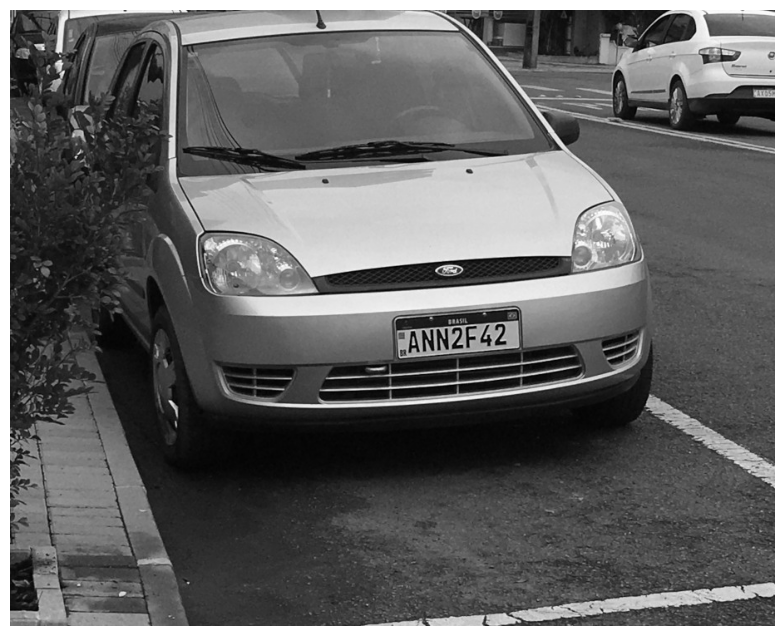

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_img(gray)

## Blur

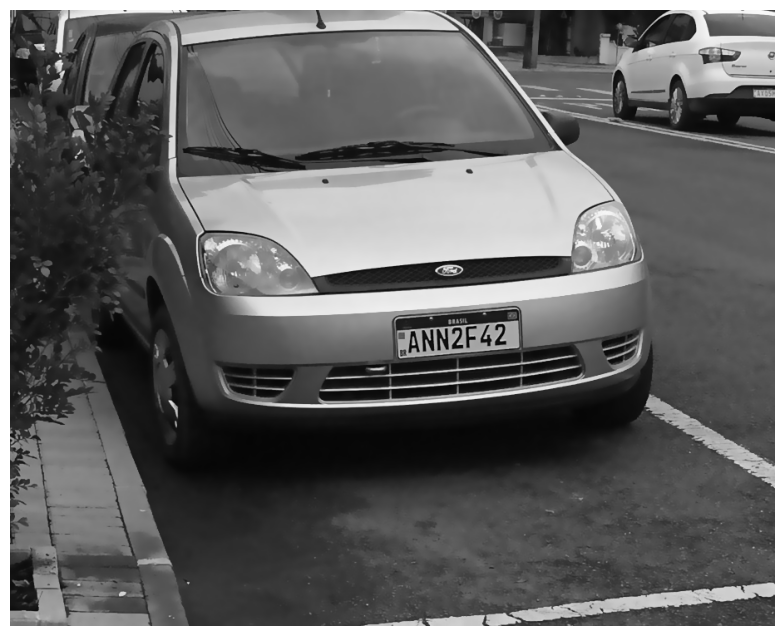

In [5]:
blur = cv2.bilateralFilter(gray, 11, 17, 17)
show_img(blur)

## Edges (Canny)

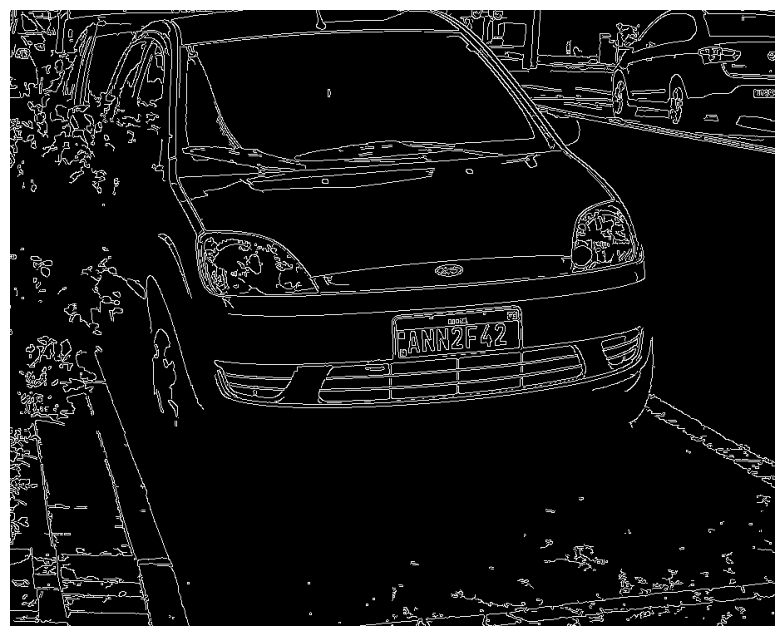

In [6]:
edged = cv2.Canny(blur, 30, 200)
show_img(edged)

## Contours

In [7]:
conts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
conts = imutils.grab_contours(conts)
conts = sorted(conts, key=cv2.contourArea, reverse=True)[:8]

In [8]:
conts

[array([[[465,   0]],
 
        [[466,   0]],
 
        [[467,   1]],
 
        ...,
 
        [[468,   0]],
 
        [[467,   1]],
 
        [[466,   0]]], dtype=int32),
 array([[[505,   2]],
 
        [[506,   1]],
 
        [[509,   1]],
 
        ...,
 
        [[509,   4]],
 
        [[508,   3]],
 
        [[506,   3]]], dtype=int32),
 array([[[603, 355]],
 
        [[602, 356]],
 
        [[592, 356]],
 
        ...,
 
        [[611, 356]],
 
        [[608, 356]],
 
        [[607, 355]]], dtype=int32),
 array([[[604, 374]],
 
        [[605, 373]],
 
        [[609, 373]],
 
        [[611, 375]],
 
        [[611, 395]],
 
        [[612, 396]],
 
        [[612, 404]],
 
        [[610, 406]],
 
        [[606, 406]],
 
        [[605, 407]],
 
        [[594, 407]],
 
        [[593, 408]],
 
        [[584, 408]],
 
        [[583, 409]],
 
        [[572, 409]],
 
        [[571, 410]],
 
        [[562, 410]],
 
        [[561, 411]],
 
        [[548, 411]],
 
        [[547, 412]],
 
    

## Finding the region

In [9]:
location = None
for c in conts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if cv2.isContourConvex(approx):
        if len(approx) == 4:
            location = approx
            break

In [10]:
location

array([[[611, 375]],

       [[610, 406]],

       [[467, 417]],

       [[466, 385]]], dtype=int32)

In [11]:
mask = np.zeros(gray.shape, dtype="uint8")
mask.shape

(741, 920)

In [12]:
print(mask)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


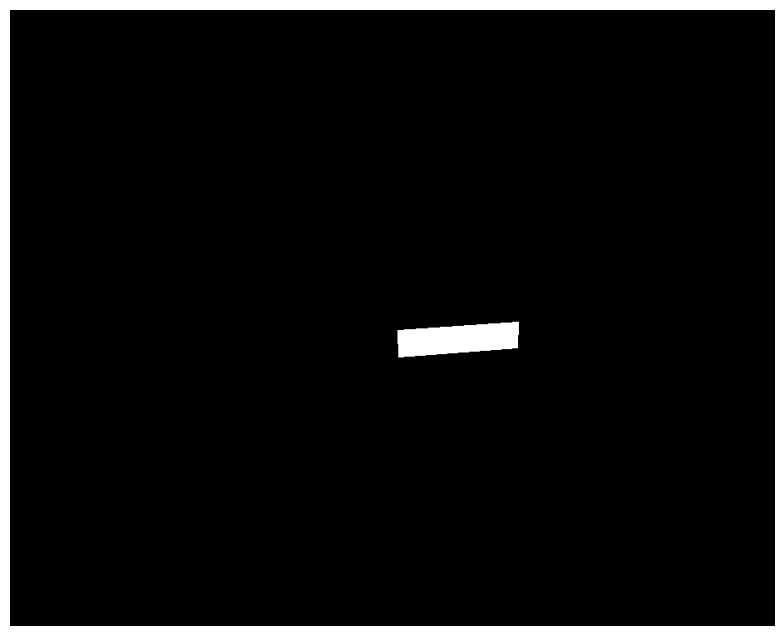

In [13]:
img_plate = cv2.drawContours(mask, [location], 0, 255, -1)
show_img(mask)

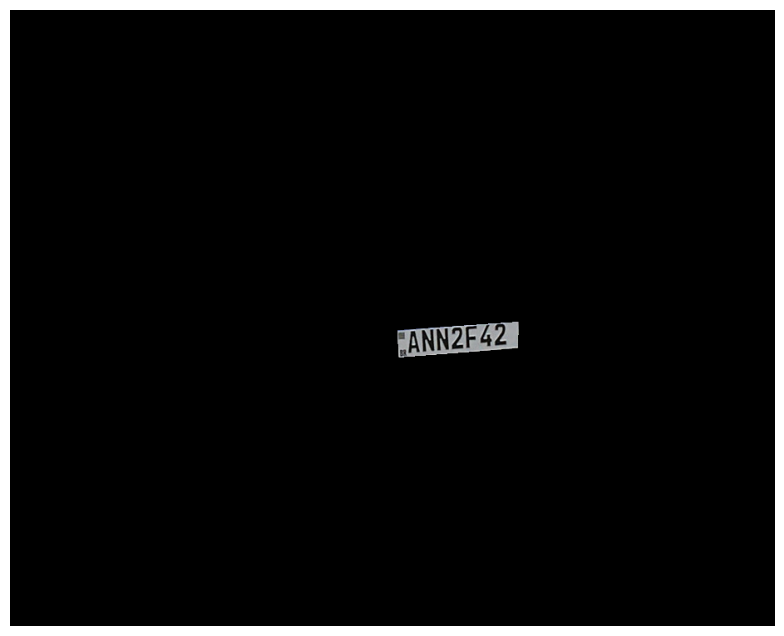

In [14]:
img_plate = cv2.bitwise_and(img, img, mask=mask)
show_img(img_plate)

In [15]:
(y, x) = np.where(mask==255)
(begin_x, begin_y) = (np.min(x), np.min(y))
(end_x, end_y) = (np.max(x), np.max(y))

In [16]:
begin_x, begin_y, end_x, end_y

(466, 375, 611, 417)

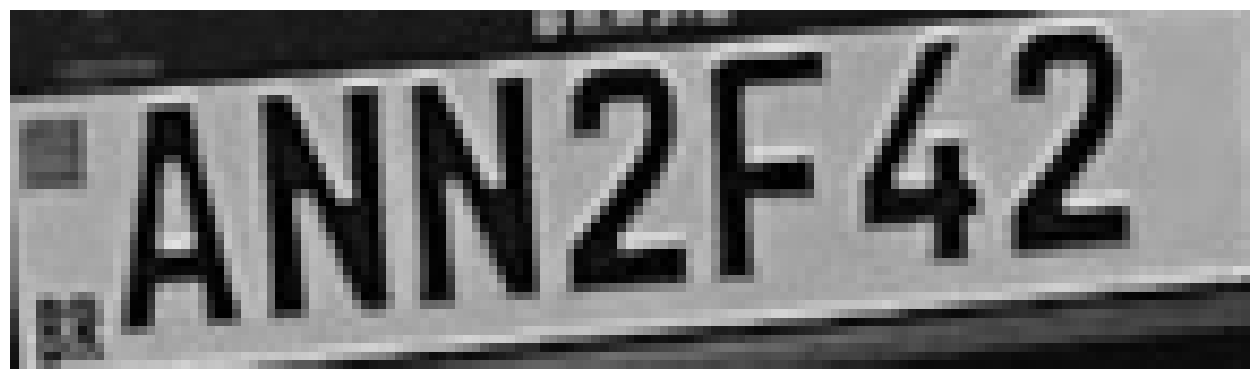

In [17]:
plate = gray[begin_y:end_y, begin_x:end_x]
show_img(plate)

## Text Recognition

In [18]:
config_tesseract = "--tessdata-dir tessdata --psm 8"

In [19]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [20]:
text = pytesseract.image_to_string(plate, lang="por", config=config_tesseract)
print(text)

"ANN2F42


In [21]:
text

'"ANN2F42\n'

In [22]:
text = "".join(c for c in text if c.isalnum())
text

'ANN2F42'

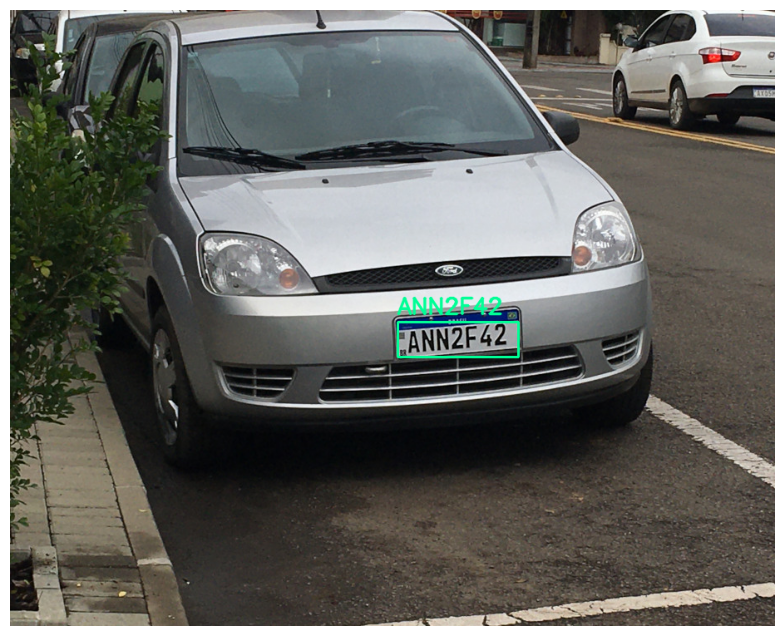

In [23]:
img_final = cv2.putText(img, f'{text}', (begin_x, begin_y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (150, 255, 0), 2, lineType=cv2.LINE_AA)
img_final = cv2.rectangle(img, (begin_x, begin_y), (end_x, end_y), (150, 255, 0), 2)
show_img(img_final)

In [24]:
def detect_plate(file_img):
    img = cv2.imread(file_img)
    (H, W) = img.shape[:2]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(blur, 30, 200)
    show_img(edged)
    conts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    conts = imutils.grab_contours(conts)
    conts = sorted(conts, key=cv2.contourArea, reverse=True)[:8]
    
    location = None
    for c in conts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if cv2.isContourConvex(approx):
            if len(approx) == 4:
                location = approx
                break
                
    begin_x = begin_y = end_x = end_y = None
    if location is None:
        plate = False
    else:
        mask = np.zeros(gray.shape, dtype=np.uint8)
        
        img_plate = cv2.drawContours(mask, [location], 0 , 255, -1)
        img_plate = cv2.bitwise_and(img, img, mask=mask)

        (y, x) = np.where(mask==255)
        (begin_x, begin_y) = (np.min(x), np.min(y))
        (end_x, end_y) = (np.max(x), np.max(y))
        
        plate = gray[begin_y:end_y, begin_x:end_x]
        show_img(plate)
    return img, plate, begin_x, begin_y, end_x, end_y
        
        

In [25]:
def ocr_plate(plate):
    config_tesseract = '--tessdata-dir tessdata --psm 8'
    text = pytesseract.image_to_string(plate, lang='por', config=config_tesseract)
    text = "".join(c for c in text if c.isalnum())
    return text

In [26]:
def recognize_plate(file_img):
    img, plate, begin_x, begin_y, end_x, end_y = detect_plate(file_img)
    
    if plate is False:
        print("Unable detect licensed plate")
        return 0
    
    text = ocr_plate(plate)
    print("detected plate: {}".format(text))
    img = cv2.putText(img, text, (begin_x, begin_y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (150, 255, 0), 2, lineType=cv2.LINE_AA)
    img = cv2.rectangle(img, (begin_x, begin_y), (end_x, end_y), (150, 255, 0), 2)
    show_img(img)
    
    return img, plate

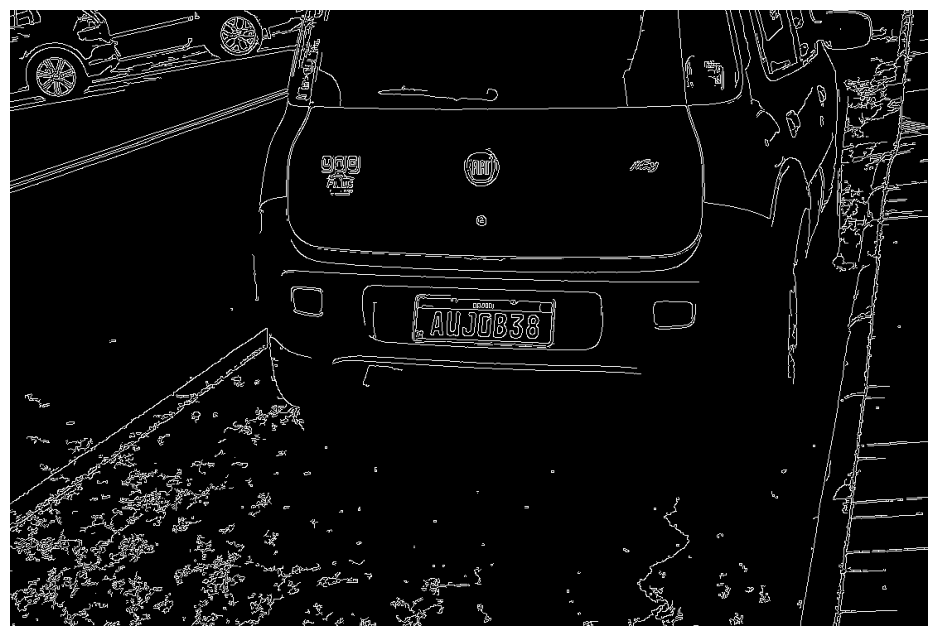

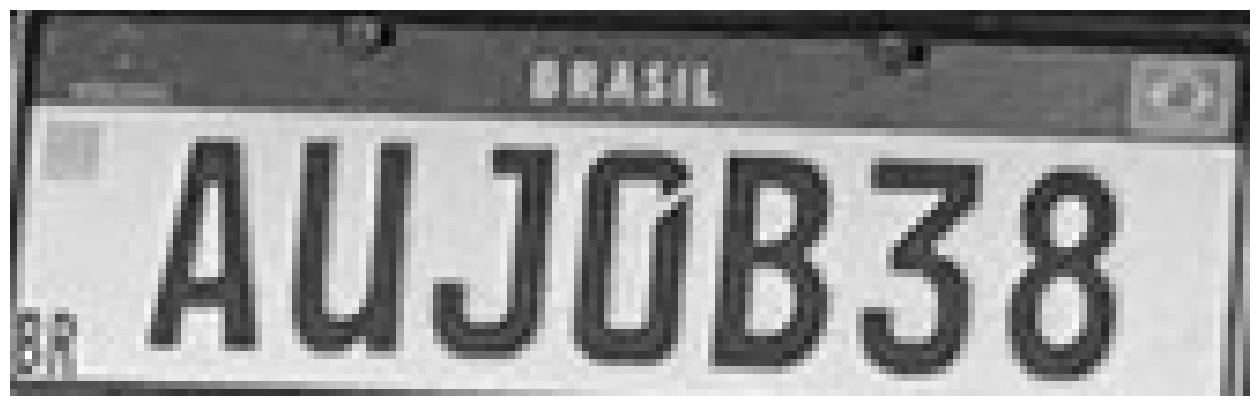

detected plate: AUJOB38


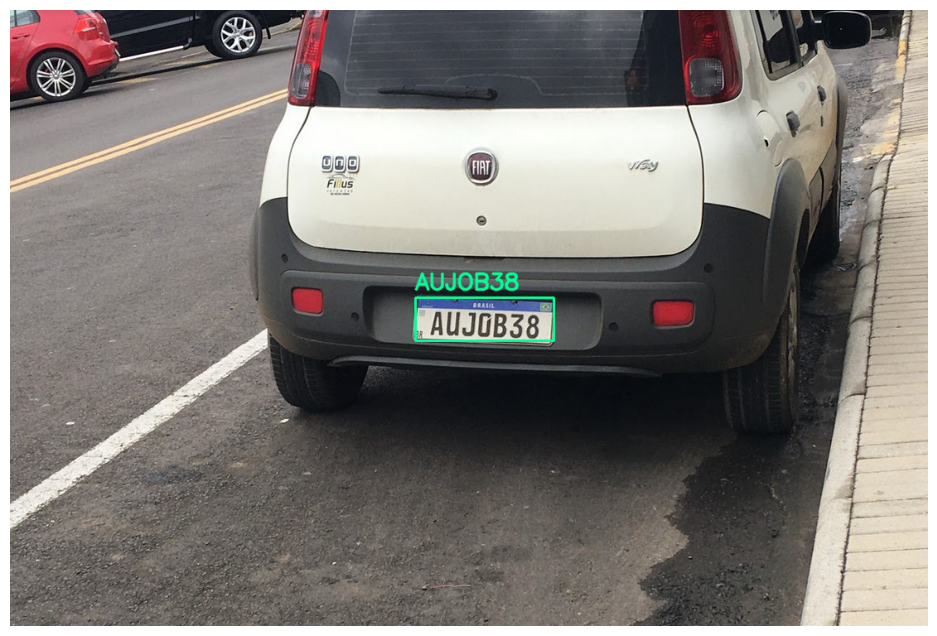

In [27]:
img, plate = recognize_plate('Sources/Images/Images Project 3/car2.jpg')

## Improving the quality

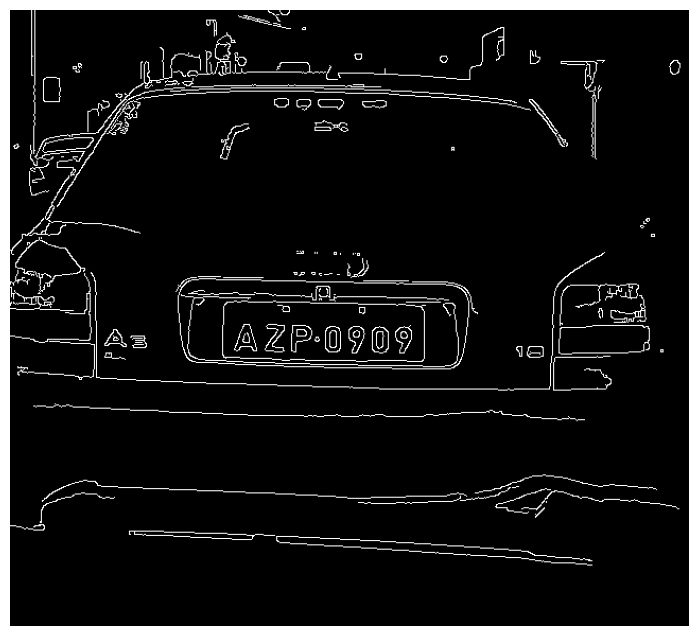

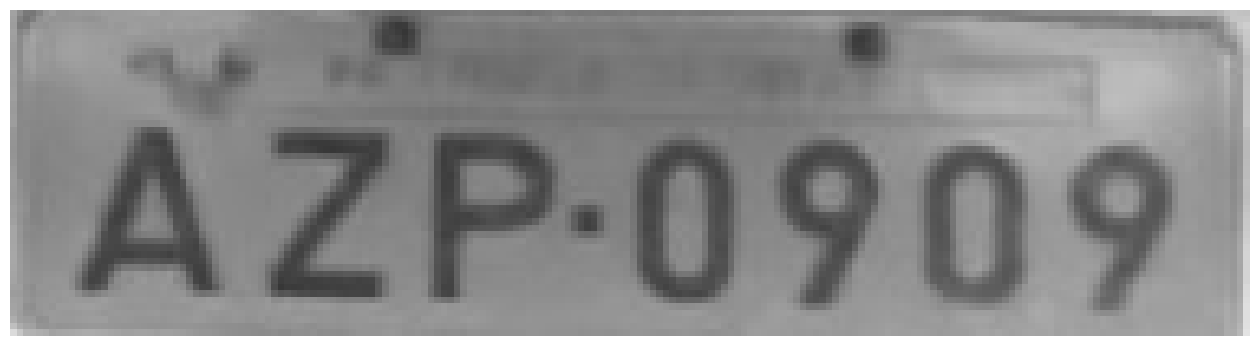

detected plate: AZP0909


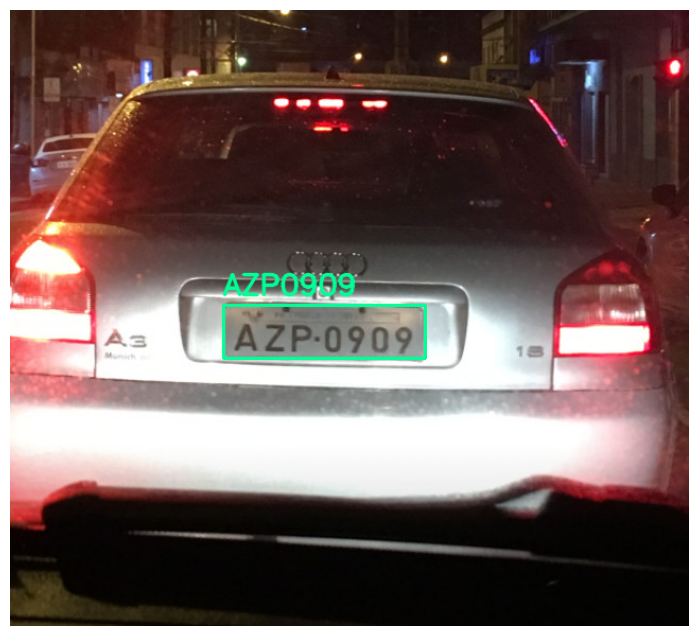

In [28]:
img, plate = recognize_plate('Sources/Images/Images Project 3/car3.jpg')


In [29]:
def preprocessing(img):
    increase = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
    value, otsu = cv2.threshold(increase, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    return otsu

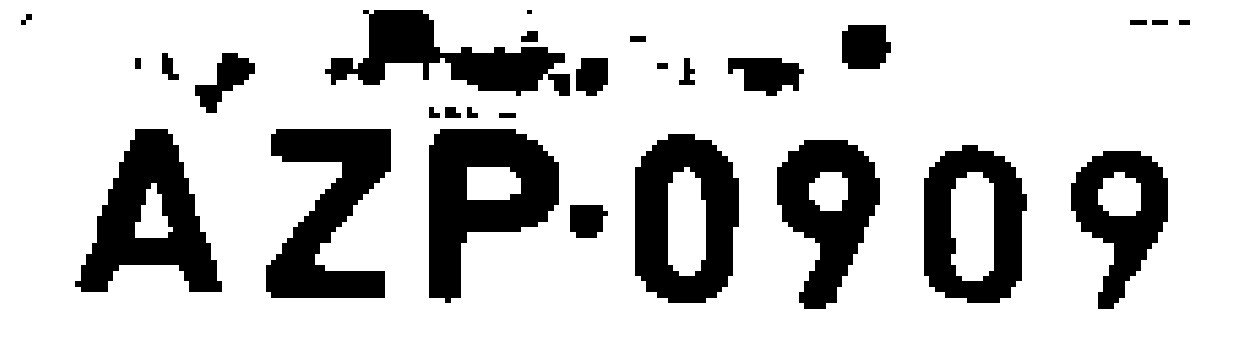

In [30]:
processed_plate = preprocessing(plate)
show_img(processed_plate)

In [31]:
text = ocr_plate(processed_plate)
print(text)

AZP0909
